In [ ]:
"Hello"

'Hello'

In [ ]:
"practice"

'practice'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Parkss0/251119/0d54ee6950128c492f38bf87a13c98addeae0e09/df5_export3.csv"

df5 = pd.read_csv(url)
print(df5.shape)
df5.head()


(9393, 99)


,chembl_id,canonical_smiles,alogp,molecular_weight,hba,hbd,psa,rtb,qed_weighted,num_ro5_violations,...,qed_rdkit,fsp3,num_chiral_centers,aromatic_atom_fraction,ro3_pass,leadlike_oprea_pass,druglike_dsx_pass,rdmol,sa_score,np_likeness
0,CHEMBL2,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,1.78,383.41,8,1,106.95,4,0.73,0,...,0.726562,0.315789,0,0.535714,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.302066,-1.294172
1,CHEMBL3,CN1CCC[C@H]1c1cccnc1,1.85,162.24,2,0,16.13,1,0.63,0,...,0.626152,0.500000,1,0.500000,1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.499926,-0.412007
2,CHEMBL6200,c1cncc([C@@H]2CCCN2)c1,1.51,148.21,2,1,24.92,1,0.65,0,...,0.652566,0.444444,1,0.545455,1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.697824,-0.092102
3,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1.54,361.37,6,1,75.01,2,0.87,0,...,0.874740,0.444444,1,0.384615,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,3.097642,-0.211796
4,CHEMBL5,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,1.42,232.24,4,1,72.19,2,0.85,0,...,0.849524,0.250000,0,0.588235,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.150688,-0.977981


In [2]:
import pandas as pd

# df5가 이미 메모리에 있다고 가정
df = df5.copy()

# 1) phase1_label 생성 (없으면)
if "phase1_label" not in df.columns:
    df["phase1_label"] = (df["max_phase"] <= 1).astype(int)

# 2) Chemprop가 쓸 컬럼만 선택
df_cp = df[["canonical_smiles", "phase1_label"]].dropna().copy()
df_cp = df_cp.rename(columns={
    "canonical_smiles": "smiles",
    "phase1_label": "y",          # Chemprop target column 이름
})

print("Chemprop용 샘플 수:", len(df_cp))
print(df_cp["y"].value_counts(normalize=True).rename("ratio"))

# 3) CSV로 저장
df_cp.to_csv("chemprop_phase1.csv", index=False)
print("Saved: chemprop_phase1.csv")


Chemprop용 샘플 수: 9393
y
0    0.904716
1    0.095284
Name: ratio, dtype: float64
Saved: chemprop_phase1.csv


In [3]:
import chemprop, sys
print("chemprop version:", chemprop.__version__)
print("python exe:", sys.executable)


ModuleNotFoundError: No module named 'chemprop'

In [5]:
!pip install chemprop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 96.4 MB/s eta 0:00:00


In [6]:
!chemprop train \
  -i chemprop_phase1.csv \
  -t classification \
  --smiles-columns smiles \
  --target-columns y \
  --split SCAFFOLD_BALANCED \
  --split-sizes 0.8 0.1 0.1 \
  --metrics prc \
  --epochs 50 \
  --class-balance \
  -o chemprop_phase1_model


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 28/49 ╸━━━━━━━━━━━━━━━━ 1/22 0:00:00 • -:--:-- 0.00it/s v_num: 0.000      
                                                              train_loss_step:  
                                                              0.458 val_loss:   
                                                              0.511             
                                                              train_loss_epoch: 
Epoch 28/49 ━╸━━━━━━━━━━━━━━━ 2/22 0:00:00 • 0:00:01 98.25it/s v_num: 0.000     
                                                               train_loss_step: 
                                                               0.482 val_loss:  
                                                               0.511            
                                                               train_loss_epoch:
Epoch 28/49 ━━╺━━━━━━━━━━━━━━ 3/22 0:00:00 • 0:00:01 96.87it/s v_num: 0.000     
                                                               train_loss

In [7]:
import os

print("CWD:", os.getcwd())
print("Top-level:", os.listdir("."))

print("\nchemprop_phase1_model 안:")
print(os.listdir("chemprop_phase1_model"))

print("\nmodel_0 안:")
print(os.listdir("chemprop_phase1_model/model_0"))


CWD: /content
Top-level: ['.config', 'chemprop_phase1.csv', 'chemprop_phase1_model', 'sample_data']

chemprop_phase1_model 안:
['model_0', 'config.toml']

model_0 안:
['trainer_logs', 'checkpoints']


In [11]:
import os, glob

print("CWD:", os.getcwd())
print("model_0/checkpoints 안:")
print(os.listdir("chemprop_phase1_model/model_0/checkpoints"))

ckpts = glob.glob("chemprop_phase1_model/model_0/checkpoints/*.ckpt")
print("\n찾은 ckpt 파일들:")
for c in ckpts:
    print(" -", c)


CWD: /content
model_0/checkpoints 안:
['best-epoch=25-val_loss=0.42.ckpt', 'last.ckpt']

찾은 ckpt 파일들:
 - chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.42.ckpt
 - chemprop_phase1_model/model_0/checkpoints/last.ckpt


In [8]:
!chemprop predict \
  -i chemprop_phase1.csv \
  -t classification \
  --smiles-columns smiles \
  --model-paths chemprop_phase1_model/model_0/best.pt \
  -o chemprop_phase1_preds.csv


usage: chemprop [-h] {train,predict,convert,fingerprint,hpopt} ...
chemprop: error: unrecognized arguments: -t classification


In [9]:
import glob, os

print("현재 폴더:", os.getcwd())
print("생성된 예측 파일들:")
for f in glob.glob("chemprop_phase1_preds*.csv"):
    print(" -", f)


현재 폴더: /content
생성된 예측 파일들:


In [10]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score

# 예측 CSV 찾기
import glob
pred_path = glob.glob("chemprop_phase1_preds*.csv")[0]
print("사용할 예측 파일:", pred_path)

df_pred = pd.read_csv(pred_path)
print(df_pred.head())
print(df_pred.columns)


IndexError: list index out of range

In [ ]:
y_true = df_pred["y"].values          # Phase≤1 (1) / Phase≥2 (0)
y_score = df_pred["pred_0"].values    # Phase≤1 예측 확률

roc = roc_auc_score(y_true, y_score)
ap  = average_precision_score(y_true, y_score)

print(f"Chemprop ROC-AUC : {roc:.3f}")
print(f"Chemprop PR-AUC  : {ap:.3f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_true, y_score)
prec, rec, _ = precision_recall_curve(y_true, y_score)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Chemprop (AUC={roc:.3f})")
plt.plot([0,1],[0,1],"--",color="gray",label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Chemprop ROC curve – Phase≤1 vs Phase≥2")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"Chemprop (AP={ap:.3f})")
plt.hlines(y_true.mean(), 0, 1, linestyles="--", color="gray",
           label=f"baseline (pos rate={y_true.mean():.3f})")
plt.xlabel("Recall (Phase≤1)")
plt.ylabel("Precision (Phase≤1)")
plt.title("Chemprop Precision–Recall curve – Phase≤1 positive")
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
!chemprop predict \
  -i chemprop_phase1.csv \
  --smiles-columns smiles \
  --model-paths chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.42.ckpt \
  -o chemprop_phase1_preds.csv


2025-12-02T02:30:45 - INFO:chemprop.cli.main - Running in mode 'predict' with args: {'smiles_columns': ['smiles'], 'reaction_columns': None, 'no_header_row': False, 'num_workers': 0, 'batch_size': 64, 'accelerator': 'auto', 'devices': 'auto', 'rxn_mode': 'REAC_DIFF', 'multi_hot_atom_featurizer_mode': 'V2', 'keep_h': False, 'add_h': False, 'ignore_stereo': False, 'reorder_atoms': False, 'molecule_featurizers': None, 'descriptors_path': None, 'descriptors_columns': None, 'no_descriptor_scaling': False, 'no_atom_feature_scaling': False, 'no_atom_descriptor_scaling': False, 'no_bond_feature_scaling': False, 'no_bond_descriptor_scaling': False, 'atom_features_path': None, 'atom_descriptors_path': None, 'bond_features_path': None, 'bond_descriptors_path': None, 'constraints_path': None, 'constraints_to_targets': None, 'use_cuikmolmaker_featurization': False, 'test_path': PosixPath('chemprop_phase1.csv'), 'output': PosixPath('chemprop_phase1_preds.csv'), 'drop_extra_columns': False, 'model_pa

In [13]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

# 1) 예측 결과 파일 로드
df_pred = pd.read_csv("chemprop_phase1_preds.csv")
print(df_pred.head())
print(df_pred.columns)


                                             smiles  y    pred_0
0     COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC  0  0.430099
1                              CN1CCC[C@H]1c1cccnc1  0  0.233581
2                            c1cncc([C@@H]2CCCN2)c1  1  0.437823
3  CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23  0  0.201491
4                   CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21  0  0.214852
Index(['smiles', 'y', 'pred_0'], dtype='object')


In [14]:
# 2) target, 예측 확률 컬럼 자동 탐색
y_true = df_pred["y"].values

# 'pred' 가 들어가는 첫 번째 컬럼을 확률로 사용
pred_cols = [c for c in df_pred.columns if "pred" in c.lower()]
print("prediction columns:", pred_cols)

proba_col = pred_cols[0]   # 필요하면 여기 바꿔주면 됨
y_score = df_pred[proba_col].values

# 3) ROC-AUC, PR-AUC
roc = roc_auc_score(y_true, y_score)
ap  = average_precision_score(y_true, y_score)

print(f"Chemprop ROC-AUC : {roc:.3f}")
print(f"Chemprop PR-AUC  : {ap:.3f}")

# 4) threshold 0.5 기준 confusion matrix (Phase≤1 = positive)
import numpy as np

y_pred = (y_score >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
print("\nConfusion matrix (rows=true [0,1], cols=pred [0,1])")
print(cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")


prediction columns: ['pred_0']
Chemprop ROC-AUC : 0.847
Chemprop PR-AUC  : 0.477

Confusion matrix (rows=true [0,1], cols=pred [0,1])
[[7442 1056]
 [ 353  542]]
TN=7442, FP=1056, FN=353, TP=542


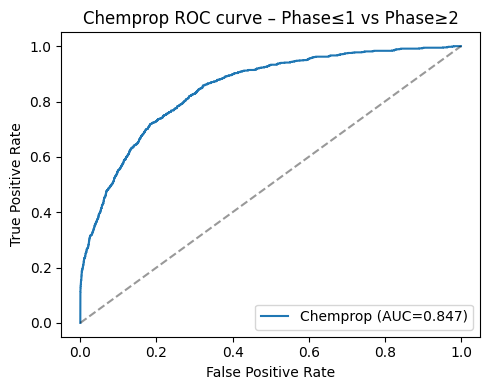

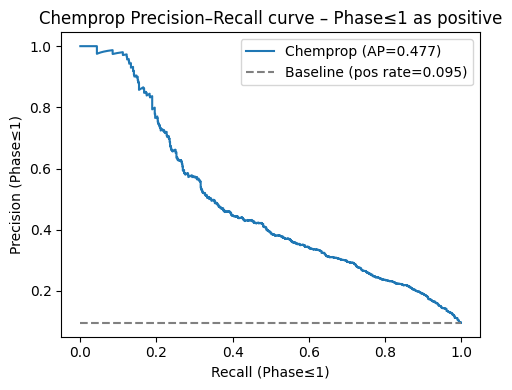

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_score)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"Chemprop (AUC={roc:.3f})")
plt.plot([0, 1], [0, 1], "k--", alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Chemprop ROC curve – Phase≤1 vs Phase≥2")
plt.legend()
plt.tight_layout()
plt.show()

# PR curve
precision, recall, _ = precision_recall_curve(y_true, y_score)
base_rate = (y_true == 1).mean()

plt.figure(figsize=(5, 4))
plt.plot(recall, precision, label=f"Chemprop (AP={ap:.3f})")
plt.hlines(base_rate, 0, 1, linestyles="--", colors="gray",
           label=f"Baseline (pos rate={base_rate:.3f})")
plt.xlabel("Recall (Phase≤1)")
plt.ylabel("Precision (Phase≤1)")
plt.title("Chemprop Precision–Recall curve – Phase≤1 as positive")
plt.legend()
plt.tight_layout()
plt.show()


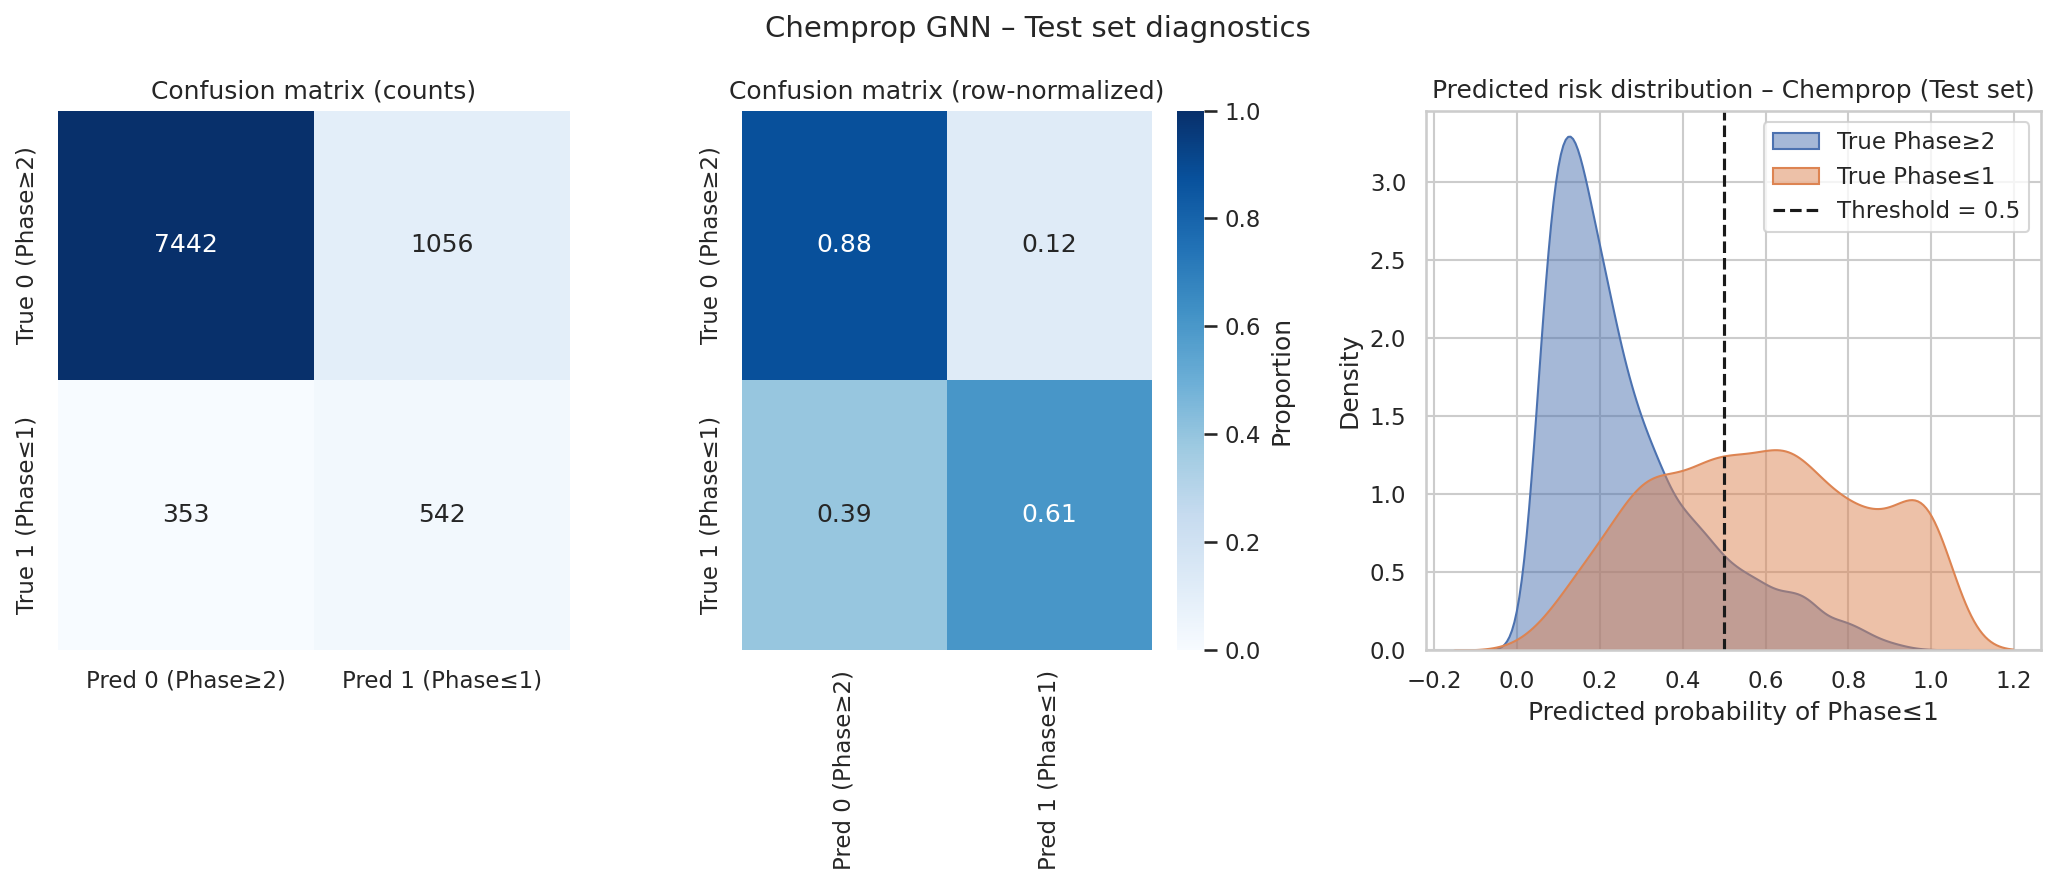

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

# ------------------------------------------------
# 1) 입력: Chemprop test set 예측
# ------------------------------------------------
# y_true: 0 = Phase≥2, 1 = Phase≤1
# y_score: predicted probability of Phase≤1 (from chemprop)
y_true = np.asarray(y_true).astype(int)
y_score = np.asarray(y_score).astype(float)

threshold = 0.5
y_pred = (y_score >= threshold).astype(int)

# Confusion matrix (counts & row-normalized)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

# ------------------------------------------------
# 2) Figure: confusion 2개 + risk 분포 1개
# ------------------------------------------------
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.2])

# (A) Confusion matrix – counts
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax1,
)
ax1.set_title("Confusion matrix (counts)")
ax1.set_xlabel("")
ax1.set_ylabel("")

# (B) Confusion matrix – row-normalized
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": "Proportion"},
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax2,
)
ax2.set_title("Confusion matrix (row-normalized)")
ax2.set_xlabel("")
ax2.set_ylabel("")

# (C) Predicted risk distribution
ax3 = fig.add_subplot(gs[0, 2])
sns.kdeplot(
    x=y_score[y_true == 0],
    fill=True,
    alpha=0.5,
    label="True Phase≥2",
    ax=ax3,
)
sns.kdeplot(
    x=y_score[y_true == 1],
    fill=True,
    alpha=0.5,
    label="True Phase≤1",
    ax=ax3,
)
ax3.axvline(threshold, color="k", linestyle="--", label=f"Threshold = {threshold}")
ax3.set_xlabel("Predicted probability of Phase≤1")
ax3.set_ylabel("Density")
ax3.set_title("Predicted risk distribution – Chemprop (Test set)")
ax3.legend(loc="upper right")

fig.suptitle("Chemprop GNN – Test set diagnostics", y=0.98, fontsize=14)
plt.tight_layout()
plt.show()
